### **Credit Card Fraud Detection**
**By: Heroshi Joe Abejuela** (Codsoft Data Science Intern)

#### **Introduction**
Credit card fraud is a critical issue for financial institutions and consumers, particularly as online transactions increase. The challenge lies in effectively detecting fraudulent activities, which often occur in highly imbalanced datasets where fraudulent transactions are rare compared to legitimate ones.

#### **Problem**
Imbalanced datasets can severely hinder model performance. Traditional classification algorithms may excel in overall accuracy by predominantly predicting the majority class (legitimate transactions), resulting in low recall for the minority class (fraudulent transactions). This makes it difficult to identify and flag fraudulent activities effectively.

#### **Solution**
To address this challenge, I implemented various machine learning models—Logistic Regression and Random Forest—using different data balancing techniques: imbalanced, undersampled, and oversampled data. This strategy aimed to enhance the models' ability to detect fraud while maintaining accuracy and improving recall.

#### **Results**
The following table summarizes the performance of the top models trained on oversampled data:

| Overall Rank | Model                   | Data Balancing | Accuracy | F1-Score | ROC AUC |
|--------------|-------------------------|----------------|----------|----------|---------|
| 1            | Logistic Regression     | Oversampled    | 94.1%    | 95.5%    | 0.98    |
| 2            | Random Forest           | Oversampled    | 91.4%    | 94.5%    | 0.99    |

The Logistic Regression model achieved the highest overall performance, effectively balancing precision and recall for detecting fraudulent transactions. The high ROC AUC values indicate strong discrimination ability between genuine and fraudulent transactions, making it a reliable choice for fraud detection in credit card transactions.

In [ ]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import itertools

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Download Data Set
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 92% 61.0M/66.0M [00:00<00:00, 64.7MB/s]
100% 66.0M/66.0M [00:00<00:00, 69.9MB/s]


In [ ]:
# Unzip Data Set
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
# Load Data Set
df = pd.read_csv('creditcard.csv')

In [ ]:
# Display First 5 rows of the data set
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Inspect for null or missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

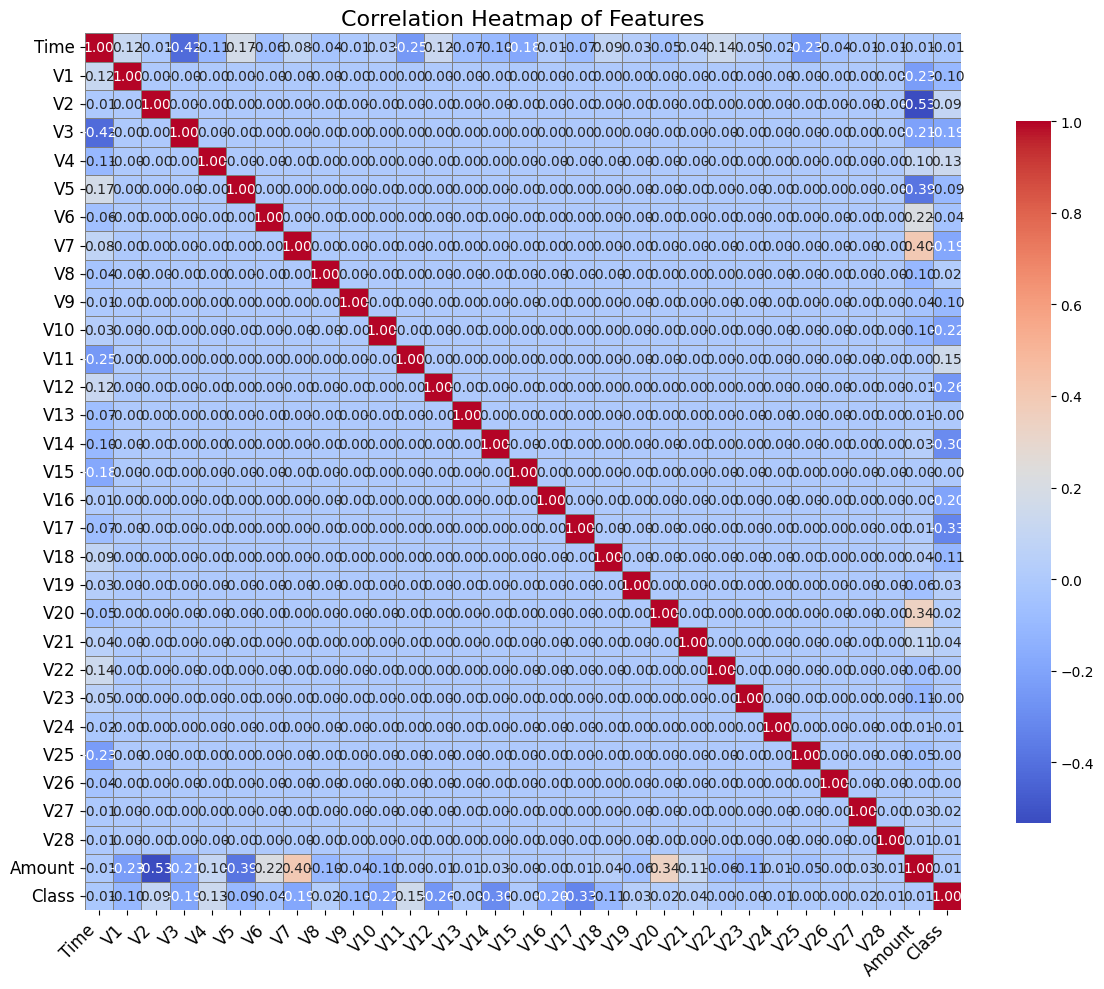

In [ ]:
# Correlation heatmap for features
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

# Create the heatmap
sns.heatmap(correlation_matrix,
            cmap='coolwarm',
            annot=True,
            fmt='.2f',
            linewidths=0.5,
            linecolor='gray',
            cbar_kws={"shrink": .8})

# Add title and labels
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Remove duplicates
df_cleaned = df.drop_duplicates()

# Step 2: Split the dataset into features and target
X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

# Step 3: Split into training and testing sets (for original data)
X_train, X_test_original, y_train, y_test_original = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Create a new test set for undersampled data (take the same proportion as in training)
X_test_undersampled, y_test_undersampled = X_test_original.copy(), y_test_original.copy()
X_test_undersampled, y_test_undersampled = undersampler.fit_resample(X_test_undersampled, y_test_undersampled)

# Step 5: Oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Create a new test set for oversampled data (take the same proportion as in training)
X_test_oversampled, y_test_oversampled = X_test_original.copy(), y_test_original.copy()
X_test_oversampled, y_test_oversampled = smote.fit_resample(X_test_oversampled, y_test_oversampled)

# Print the class distributions for training and test sets
print("Original Imbalanced Data Distribution:")
print(y_train.value_counts())
print(f"Test set shape: {y_test_original.shape}")

print("\nUndersampled Data Distribution:")
print(y_train_undersampled.value_counts())
print(f"Test set shape: {y_test_undersampled.shape}")

print("\nOversampled Data Distribution:")
print(y_train_oversampled.value_counts())
print(f"Test set shape: {y_test_oversampled.shape}")

Original Imbalanced Data Distribution:
Class
0    226597
1       383
Name: count, dtype: int64
Test set shape: (56746,)

Undersampled Data Distribution:
Class
0    383
1    383
Name: count, dtype: int64
Test set shape: (180,)

Oversampled Data Distribution:
Class
0    226597
1    226597
Name: count, dtype: int64
Test set shape: (113312,)


In [ ]:
# Function to plot class distribution
def plot_class_distribution(y, title, color1, color2):
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=y, palette=[color1, color2])

    # Adding counts above the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')

    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Genuine (0)', 'Fraudulent (1)'])
    plt.show()

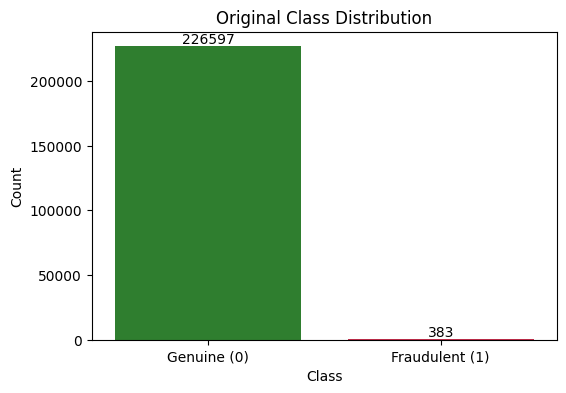

In [ ]:
# Step 5: Plot original class distribution
plot_class_distribution(y_train, "Original Class Distribution", 'forestgreen', 'crimson')

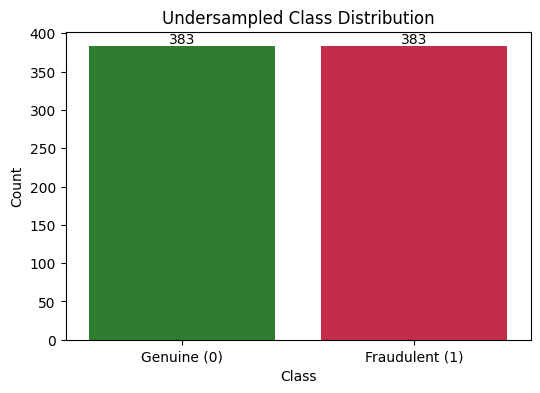

In [ ]:
# Step 6: Plot undersampled class distribution
plot_class_distribution(y_train_undersampled, "Undersampled Class Distribution", 'forestgreen', 'crimson')

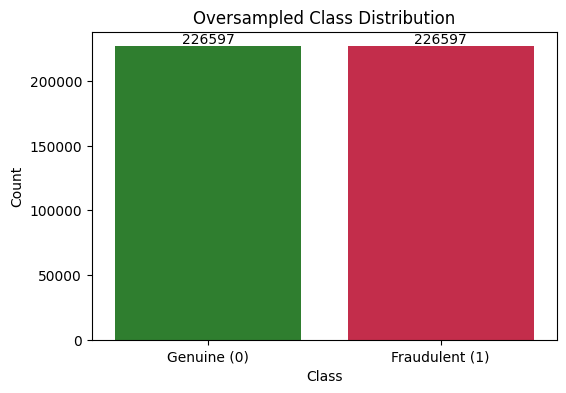

In [ ]:
# Step 7: Plot oversampled class distribution
plot_class_distribution(y_train_oversampled, "Oversampled Class Distribution", 'forestgreen', 'crimson')

In [ ]:
def train_and_visualize_models(X_test, y_test, X_train_sampled, y_train_sampled, method_name,
                               n_estimators=100, random_state=None):
    """
    Train models and visualize results.

    Parameters:
    - X_test: pd.DataFrame
        Test features.
    - y_test: pd.Series
        Test labels.
    - X_train_sampled: pd.DataFrame
        Training features after sampling.
    - y_train_sampled: pd.Series
        Training labels after sampling.
    - method_name: str
        Name of the sampling method used (e.g., "Imbalanced Data", "Undersampled Data", "Oversampled Data").
    - n_estimators: int, optional
        Number of trees in the Random Forest model (default is 100).
    - random_state: int, optional
        Seed for random number generator (default is None).

    Returns:
    None
    """
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    }

    for model_name, model in models.items():
        print(f"\nTraining on {method_name} using {model_name}:")

        # Train the model on the respective sampled data
        model.fit(X_train_sampled, y_train_sampled)
        y_pred = model.predict(X_test)  # Use the corresponding test set

        print(f"\n{model_name} Results:")
        print(classification_report(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Genuine (0)', 'Fraudulent (1)'],
                    yticklabels=['Genuine (0)', 'Fraudulent (1)'])
        plt.title(f'Confusion Matrix for {model_name} ({method_name})')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')

        # ROC Curve
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc = roc_auc_score(y_test, y_probs)
        plt.subplot(1, 2, 2)
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'ROC Curve for {model_name} ({method_name})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.tight_layout()
        plt.show()


Training on Imbalanced Data using Logistic Regression:

Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.83      0.49      0.62        90

    accuracy                           1.00     56746
   macro avg       0.91      0.74      0.81     56746
weighted avg       1.00      1.00      1.00     56746



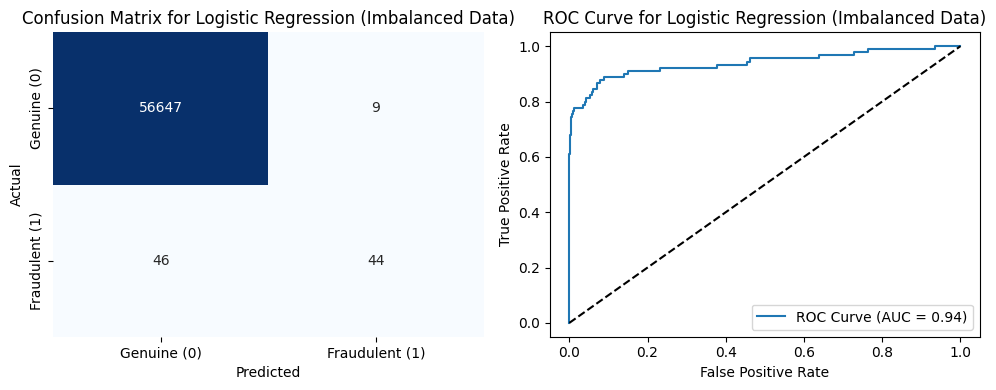


Training on Imbalanced Data using Random Forest:

Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.71      0.82        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



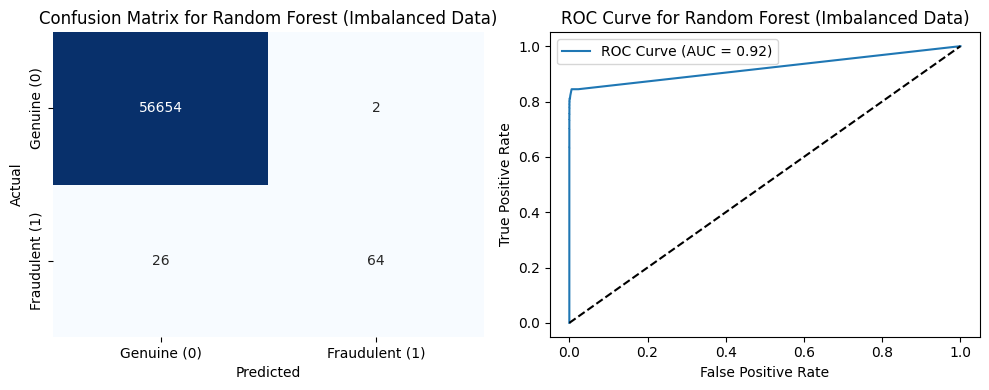

In [ ]:
# 1. Training and visualizing using imbalanced data
train_and_visualize_models(X_test_original, y_test_original, X_train, y_train,
                           method_name="Imbalanced Data")


Training on Undersampled Data using Logistic Regression:

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        90
           1       0.94      0.88      0.91        90

    accuracy                           0.91       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.91      0.91      0.91       180



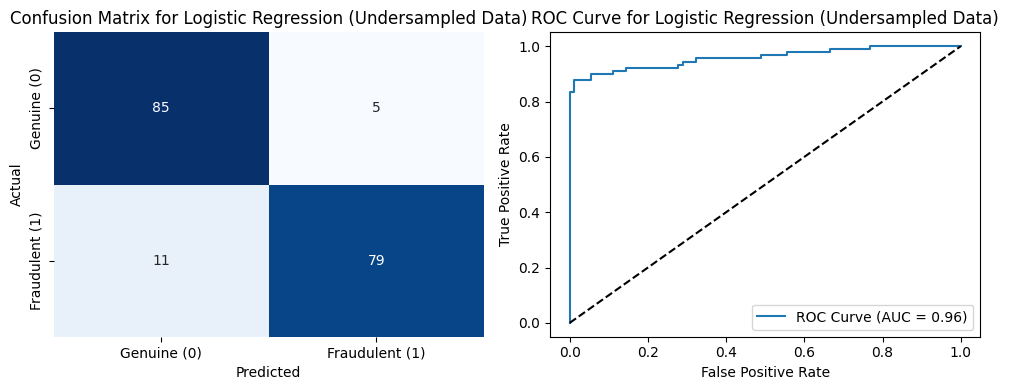


Training on Undersampled Data using Random Forest:

Random Forest Results:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        90
           1       0.99      0.88      0.93        90

    accuracy                           0.93       180
   macro avg       0.94      0.93      0.93       180
weighted avg       0.94      0.93      0.93       180



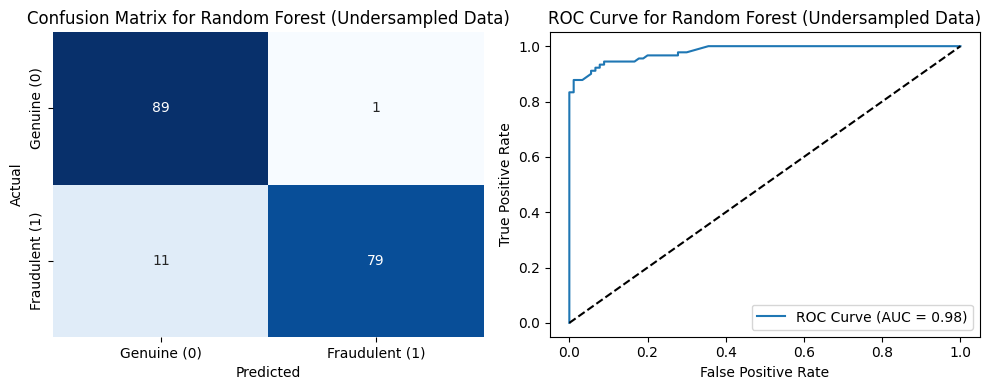

In [ ]:
# 2. Training and visualizing using undersampled data
train_and_visualize_models(X_test_undersampled, y_test_undersampled, X_train_undersampled,
                           y_train_undersampled, method_name="Undersampled Data")


Training on Oversampled Data using Logistic Regression:

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     56656
           1       0.97      0.94      0.96     56656

    accuracy                           0.96    113312
   macro avg       0.96      0.96      0.96    113312
weighted avg       0.96      0.96      0.96    113312



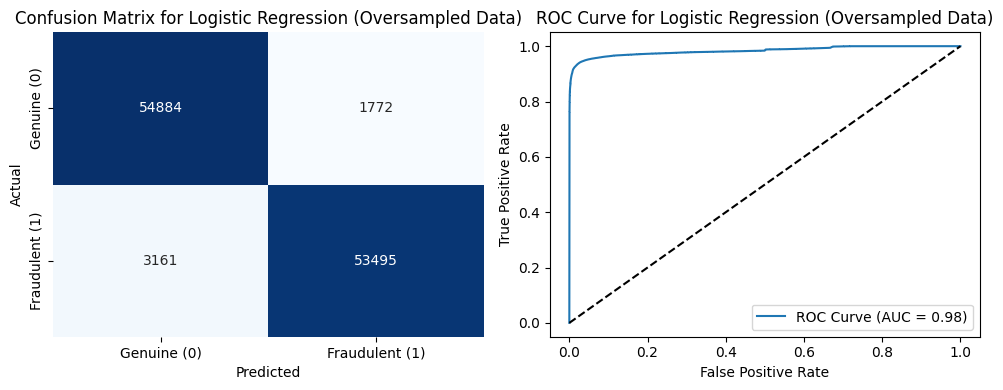


Training on Oversampled Data using Random Forest:

Random Forest Results:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     56656
           1       1.00      0.90      0.95     56656

    accuracy                           0.95    113312
   macro avg       0.95      0.95      0.95    113312
weighted avg       0.95      0.95      0.95    113312



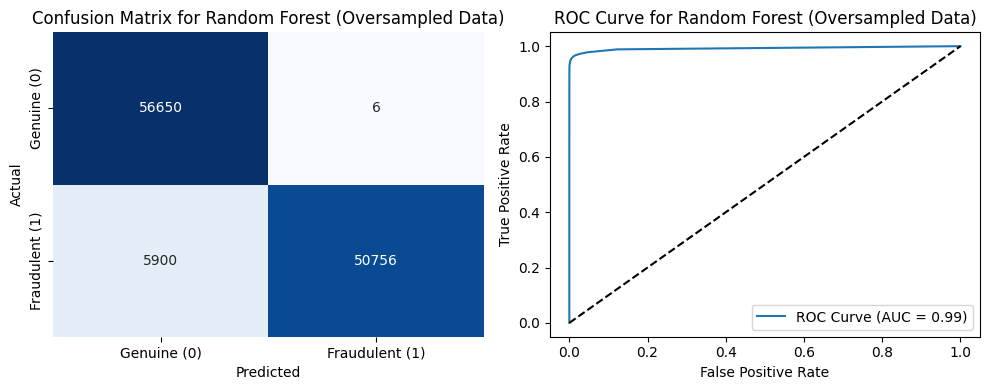

In [ ]:
# 3. Training and visualizing using oversampled data
train_and_visualize_models(X_test_oversampled, y_test_oversampled, X_train_oversampled,
                           y_train_oversampled, method_name="Oversampled Data")

# **Overall Rankings**

| Overall Rank | Model                      | Data Balancing | Accuracy | F1-Score | ROC AUC |
|--------------|----------------------------|-----------------|----------|----------|---------|
| 1            | Logistic Regression        | Oversampled     | 94.1%    | 95.5%    | 0.98    |
| 2            | Random Forest              | Oversampled     | 91.4%    | 94.5%    | 0.99    |
| 3            | Random Forest              | Undersampled    | 88.9%    | 88.9%    | 0.98    |
| 4            | Logistic Regression        | Undersampled    | 90.0%    | 86.7%    | 0.96    |
| 5            | Logistic Regression        | Imbalanced      | 99.9%    | 61.0%    | 0.94    |
| 6            | Random Forest              | Imbalanced      | 99.8%    | 47.1%    | 0.92    |

**Why Accuracy and F1-Score Can Be Misleading in Imbalanced Datasets:**

* **Accuracy:** In imbalanced datasets, a model can achieve high accuracy by simply predicting the majority class most of the time. For example, if 99% of transactions are genuine, a model that always predicts "genuine" would have 99% accuracy, even though it fails to detect any fraud.

* **F1-Score:** The F1-score is a harmonic mean of precision and recall. In imbalanced datasets, if a model has high precision but very low recall (as seen in the imbalanced cases above), the F1-score will be pulled down significantly, providing a more realistic assessment of the model's performance.

**Notes**

While the imbalanced models appear to have high accuracy and F1-scores, these metrics are misleading due to the class imbalance. The low ROC AUC values and the likely low recall in these cases indicate that these models are not effectively detecting fraud.

**Which Model and Technique is Best?**

* **Oversampling is Crucial:** Both models significantly benefit from oversampling, which addresses the class imbalance and leads to better fraud detection (higher recall).

* **Logistic Regression (Oversampled):**  A strong contender with high accuracy, a good balance between precision and recall, and a strong ROC AUC. It's likely to be a good choice when both false positives and false negatives have significant costs.

* **Random Forest (Oversampled):**  Excels in precision, minimizing false positives. This is valuable when incorrectly flagging a legitimate transaction is highly undesirable. However, it comes at the cost of lower recall, potentially missing more actual fraud cases.

**Recommendation:**

* **Prioritize Recall:** If catching as many fraudulent transactions as possible is paramount, even at the risk of slightly more false positives, **Logistic Regression with oversampling** appears to be the most suitable approach.

* **Prioritize Precision:** If minimizing false positives is critical, even if it means potentially missing some fraudulent cases, **Random Forest with oversampling** might be preferred.

* **Further Evaluation:**  It's highly recommended to:
    * **Conduct a cost-benefit analysis:** Quantify the real-world costs associated with different types of errors to make a more informed decision.

### **More Projects and Contact Information**

For more details on my projects and work, please visit my [GitHub profile](https://github.com/HiroshiJoe). You can also connect with me on [LinkedIn](https://www.linkedin.com/in/heroshi-joe-abejuela-513413314/) for professional updates and networking.

Feel free to reach out if you have any questions or would like to discuss potential collaborations!